In [1]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
gt_labels = np.load('/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/cora_64d/all_gt_labels.npy')
print(gt_labels.shape)
all_embeds = np.load('/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/cora_64d/all_embs.npy')
print(all_embeds.shape)

(2708,)
(2708, 64)


In [3]:
#run kmeans
num_cluster = 7
kmeans = KMeans(n_clusters=num_cluster, random_state=8)
cluster_assignments = kmeans.fit_predict(all_embeds)
v, cnt = np.unique(cluster_assignments, return_counts=True)
print(cnt)

[177 613 341 326 203 411 637]


In [4]:
#save the cluster assignments
np.save('/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/cora_64d/cluster_assignments_7.npy', cluster_assignments)

In [7]:
cluster_ass = np.load('/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/cora_64d/cluster_assignments_7.npy')

In [8]:
np.unique(cluster_ass, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([177, 613, 341, 326, 203, 411, 637]))

In [9]:
gt_labels

array([3, 4, 4, ..., 3, 3, 3])

In [23]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(all_embeds)

/home/local/ASUAD/ywan1053/anaconda3/envs/geo/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/local/ASUAD/ywan1053/anaconda3/envs/geo/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2708 samples in 0.001s...
[t-SNE] Computed neighbors for 2708 samples in 0.238s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2708
[t-SNE] Computed conditional probabilities for sample 2000 / 2708
[t-SNE] Computed conditional probabilities for sample 2708 / 2708
[t-SNE] Mean sigma: 0.062229
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.172379
[t-SNE] KL divergence after 1000 iterations: 0.855880


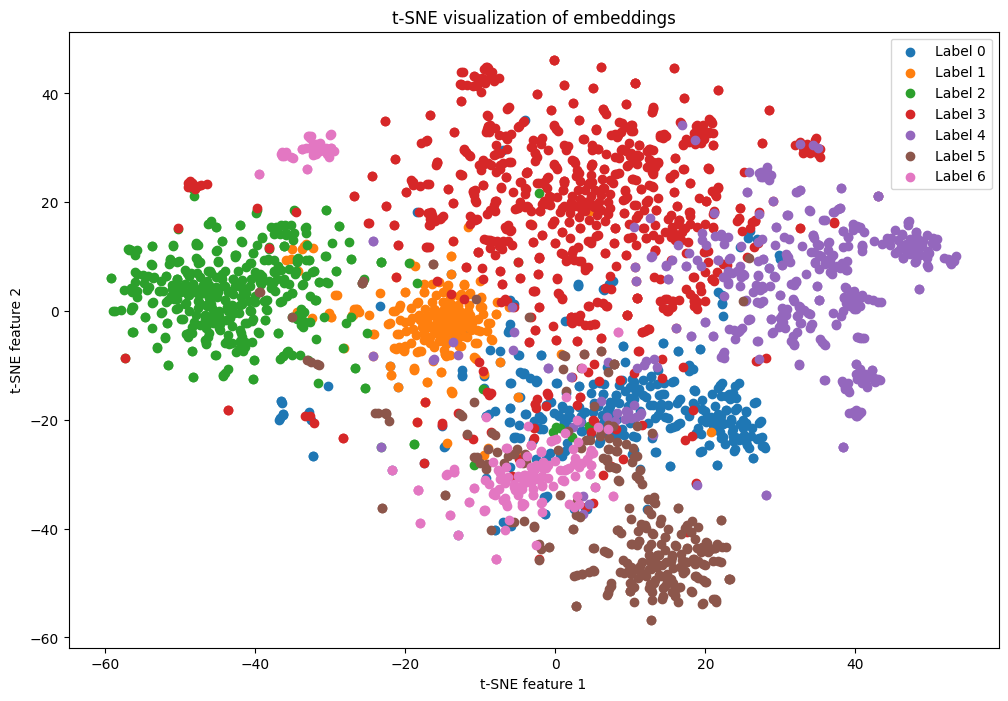

In [24]:
# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot of the reduced data, color by label
for i in range(len(np.unique(gt_labels))):  # Assuming your labels are 0-indexed categories
    plt.scatter(tsne_results[gt_labels == i, 0], tsne_results[gt_labels == i, 1], label=f'Label {i}')

plt.legend()
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE visualization of embeddings')
plt.show()